### **IMPORT LIBRARIES**

In [5]:
from tensorflow.keras.layers import Input,Dense,LSTM,GlobalMaxPool1D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras.callbacks import TensorBoard


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

# Load the TensorBoard notebook extension
%load_ext tensorboard
# Clear any logs from previous runs


In [3]:
!python3.10 -m pip install tensorflow-metal

  Obtaining dependency information for tensorflow-metal from https://files.pythonhosted.org/packages/9c/21/cac4d1f8fda8a30f631a60a7669ca1de2665189e060604a5e8f96a145ba6/tensorflow_metal-1.1.0-cp310-cp310-macosx_12_0_arm64.whl.metadata
ERROR: Could not install packages due to an OSError: HTTPSConnectionPool(host='files.pythonhosted.org', port=443): Max retries exceeded with url: /packages/9c/21/cac4d1f8fda8a30f631a60a7669ca1de2665189e060604a5e8f96a145ba6/tensorflow_metal-1.1.0-cp310-cp310-macosx_12_0_arm64.whl.metadata (Caused by NewConnectionError('<pip._vendor.urllib3.connection.HTTPSConnection object at 0x107b9b0d0>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known'))


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: pip3 install --upgrade pip


In [6]:
df = pd.read_csv("GBP_USD Historical Data.csv")
df1 = pd.read_csv("GBP_USD Historical Data (1).csv")
df2 = pd.read_csv("GBP_USD Historical Data (2).csv")
df3 = pd.read_csv("GBP_USD Historical Data (3).csv")
df.tail()

,Date,Price,Open,High,Low,Vol.,Change %
4994,28/05/1999,1.6014,1.5970,1.6044,1.5955,NaN,0.21%
4995,31/05/1999,1.6030,1.6028,1.6057,1.6007,NaN,0.10%
4996,01/06/1999,1.6122,1.6020,1.6131,1.5990,NaN,0.57%
4997,02/06/1999,1.6047,1.6110,1.6142,1.6030,NaN,-0.47%
4998,03/06/1999,1.6053,1.6038,1.6095,1.6027,NaN,0.04%


In [7]:
x1,x2,x3,x4 = df.iloc[:,2:3].values, df1.iloc[:,2:3].values, df2.iloc[:,2:3].values, df3.iloc[:,2:3].values

y1,y2,y3,y4 = df.iloc[:,1].values, df1.iloc[:,1].values, df2.iloc[:,1].values, df3.iloc[:,1].values

x1,x2,x3,x4 = np.array(x1), np.array(x2), np.array(x3), np.array(x4)
y1,y2,y3,y4 = np.array(y1), np.array(y2), np.array(y3), np.array(y4)

print(x1)
print(y1)



[[2.2391]
 [2.2287]
 [2.2252]
 ...
 [1.602 ]
 [1.611 ]
 [1.6038]]
[2.2391 2.2287 2.2252 ... 1.6122 1.6047 1.6053]


In [8]:
x = np.concatenate((x1, x2), axis=0)
y = np.concatenate((y1, y2), axis=0)

x = np.concatenate((x, x3), axis=0)
y = np.concatenate((y, y3), axis=0)
print(x)
print(y)

[[2.2391]
 [2.2287]
 [2.2252]
 ...
 [1.2849]
 [1.2849]
 [1.2832]]
[2.2391 2.2287 2.2252 ... 1.2854 1.2837 1.2833]


In [9]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.018, random_state=0)

print(len(x_train))
print(len(x_test))

print(x_train.shape)
print(x_test.shape)

11097
204
(11097, 1)
(204, 1)


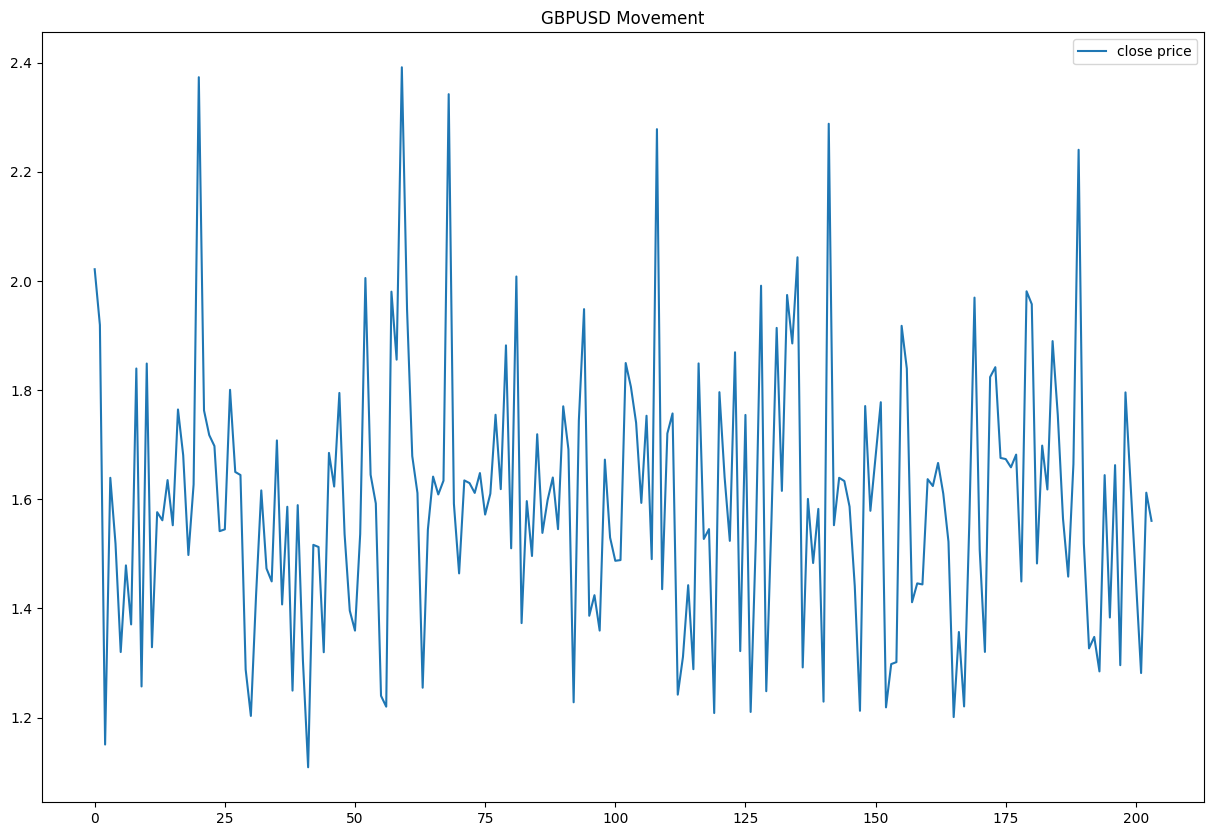

In [10]:
plt.figure(figsize=(15, 10))
plt.title('GBPUSD Movement')
plt.plot(y_test, label="close price")
plt.legend()
plt.show()

In [3]:
import tensorflow as tf
print("Num GPUs Available: ", tf.config.experimental.list_physical_devices('GPU'))




Num GPUs Available:  []


### TRAINING MODEL WITH LSTM


In [9]:
i = Input(shape = x_train.shape)
X = LSTM(512, return_sequences=True)(i)
X = LSTM(256, return_sequences=True)(X)
X = LSTM(128)(X)
X = Dense(128, activation="relu")(X)
X = Dense(1)(X)

model = Model(i, X)

model.compile(
    loss='mse',
    optimizer= Adam(learning_rate=0.02)
)
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)


r = model.fit(
    x_train,y_train,
    batch_size = 128,
    epochs = 1000,
    validation_data = (x_test, y_test),
    callbacks=[tensorboard_callback]
)

%tensorboard --logdir logs/fit

Epoch 1/1000
87/87 [==============================] - 11s 53ms/step - loss: 0.1203 - val_loss: 8.2011e-04
Epoch 2/1000
87/87 [==============================] - 3s 37ms/step - loss: 0.0010 - val_loss: 0.0153
Epoch 3/1000
87/87 [==============================] - 3s 37ms/step - loss: 0.0015 - val_loss: 1.1679e-04
Epoch 4/1000
87/87 [==============================] - 3s 38ms/step - loss: 1.0774e-04 - val_loss: 2.8196e-04
Epoch 5/1000
87/87 [==============================] - 3s 39ms/step - loss: 0.0011 - val_loss: 2.1100e-04
Epoch 6/1000
87/87 [==============================] - 3s 37ms/step - loss: 2.8332e-04 - val_loss: 5.0066e-04
Epoch 7/1000
87/87 [==============================] - 3s 38ms/step - loss: 4.6896e-04 - val_loss: 7.1329e-04
Epoch 8/1000
87/87 [==============================] - 3s 39ms/step - loss: 8.5556e-04 - val_loss: 1.7124e-04
Epoch 9/1000
87/87 [==============================] - 4s 41ms/step - loss: 3.8005e-04 - val_loss: 9.7971e-04
Epoch 10/1000
87/87 [=================

KeyboardInterrupt: 

In [ ]:
def r_squared(y_true, y_pred):
  """Calculates the R-squared score.

  Args:
    y_true: The ground truth values.
    y_pred: The predicted values.

  Returns:
    The R-squared score.
  """

  mean_y_true = np.mean(y_true)
  ss_tot = np.sum((y_true - mean_y_true)**2)
  ss_res = np.sum((y_true - y_pred)**2)
  r_squared = 1 - ss_res / ss_tot
  return r_squared

y_pred = model.predict(x_test)
y_pred = y_pred.reshape(-1)
r_squared = r_squared(y_test, y_pred)

print(r_squared)

In [ ]:
plt.title("Loss on data")
plt.plot(r.history['loss'], label="loss")
plt.plot(r.history['val_loss'], label="val_loss")
plt.legend()
plt.show()

In [ ]:
plt.title("Prediction Compare")

plt.plot(y_test, label="y_test")

plt.plot(model.predict(x_test), label="y_pred")

plt.legend()

plt.show()

In [ ]:
print(x3)
print(y3)

In [ ]:
x_target = np.concatenate((x_test,x3), axis = 0)
y_target = np.concatenate((y_test,y3), axis = 0)

print(x_target)
print(y_target)

In [ ]:
print(x_target[len(x_test): ])
print(y_target[len(y_test): ])

In [ ]:
pred = model.predict(x_target)
y_pred = pred[len(x_test): ]
print(y_pred)

In [ ]:
plt.title("Comparing with current data")
plt.plot(y_pred, label="predicted close price")
plt.plot(y3, label="current close price")
plt.plot(x3, label="open price")
plt.legend()
plt.show()

In [ ]:
plt.figure(figsize=(15, 10))
plt.title("Comparing with current data")
plt.xlabel("Number of dayz")
plt.ylabel("Prices of currency pair")
plt.plot(pred, label="predicted close price")
plt.plot(y_target, label="current close price")

#plt.plot(x3, label="open price")
plt.legend()
plt.show()